In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print("train.shape",train.shape)
print("test.shape",test.shape)

train.shape (1521787, 23)
test.shape (421665, 22)


# 資料欄位
- acqic - 收單行代碼
- bacno - 歸戶帳號
- cano - 卡號
- conam - 交易金額(台幣)
- contp - 交易類別(e.g. 一般交易/刷退...)
- csmcu - 消費地幣別
- ecfg - 網路交易註記
- etymd - 交易型態(e.g. 實體交易/網路交易)
- flbmk - Fallback交易註記(預先授權)
- flg_3dsmk - 3DS交易驗證註記
- hecfg - 支付型態
- insfg - 分期交易註記
- iterm - 分期期數
- locdt - 授權日期
- loctm - 授權時間(HHMMSS)
- mcc - 特店類別
- mchno - 特店名稱
- ovrlt - 超額交易註記
- scity - 消費地城市
- stocn - 消費地國別
- stscd - 狀態碼
- txkey - 交易序號(唯一值)
- fraud_ind - 冒用交易註記(預測目標)

In [4]:
train.head(5)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,...,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,...,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,...,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,...,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,...,0,6,182129.0,263,93775,N,5817,102,0,1051004


In [5]:
train.fraud_ind.mean()

0.013375722095142093

In [6]:
test.head(5)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,163188,116799,513.8,5,0,N,0,N,N,...,0,102,215328.0,457,59360,N,0,102,0,592489
1,6881,163188,116799,513.8,5,0,N,0,N,N,...,0,102,222007.0,457,59360,N,0,102,0,592452
2,6881,163188,116799,513.8,5,0,N,0,N,N,...,0,100,170013.0,457,59360,N,0,102,0,590212
3,6881,163188,116799,513.8,5,0,N,0,N,N,...,0,100,165914.0,457,59360,N,0,102,0,590209
4,6881,163188,116799,513.8,5,0,N,0,N,N,...,0,102,215311.0,457,59360,N,0,102,0,592488


In [7]:
# 把目標值蓋掉
test['fraud_ind'] = -1

In [8]:
df = pd.concat([train, test])

In [9]:
df.shape

(1943452, 23)

**資料說明**   
*  總比數：1943452
*  授權期間：1-120日  
*  訓練集：1-90日  
*  測試集：91-120日
---
**欄位說明**

*   bacno：歸戶帳號
*   txkey：交易序號
*   locdt：授權日期
*   loctm：授權時間
*   cano：交易卡號
*   etymd：交易型態
*   mchno：特店代號
*   acqic：收單行代碼
*   mcc：MCC_CODE
*   conam：交易金額-台幣 (經過轉換)
*   ecfg：網路交易註記
*   insfg：分期交易註記
*   iterm：分期期數
*   stocn：消費地國別
*   scity：消費城市
*   stscd：狀態碼
*   ovrlt：超額註記碼
*   flbmk：Fallback 註記
*   hcefg：支付形態
*   csmcu：消費地幣別
*   flg_3dsmk：3DS 交易註記

*   fraud_ind：盜刷註記



In [10]:
df.describe()

,acqic,bacno,cano,conam,contp,csmcu,etymd,fraud_ind,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd,txkey
count,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06
mean,6.004543e+03,8.208741e+04,1.090453e+05,6.516174e+02,4.825625e+00,5.378875e+01,4.142680e+00,-2.064934e-01,4.748365e+00,4.841128e-02,5.839281e+01,1.460061e+05,2.979138e+02,5.589230e+04,4.754399e+03,9.562308e+01,2.475286e-02,9.791667e+05
std,1.505735e+03,4.732348e+04,6.110356e+04,4.032183e+02,6.557577e-01,2.076681e+01,2.402570e+00,4.298851e-01,1.114383e+00,3.615652e-01,3.409522e+01,5.227967e+04,7.841150e+01,3.082944e+04,1.982351e+03,1.896446e+01,2.211643e-01,5.654969e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.982000e+03,4.129400e+04,5.751900e+04,4.300400e+02,5.000000e+00,6.200000e+01,2.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,2.900000e+01,1.104500e+05,2.500000e+02,3.362500e+04,3.952000e+03,1.020000e+02,0.000000e+00,4.896218e+05
50%,6.678000e+03,8.196600e+04,1.099410e+05,5.887500e+02,5.000000e+00,6.200000e+01,4.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,5.800000e+01,1.513290e+05,2.640000e+02,5.933300e+04,5.817000e+03,1.020000e+02,0.000000e+00,9.794235e+05
75%,6.769000e+03,1.229640e+05,1.621700e+05,8.025400e+02,5.000000e+00,6.200000e+01,5.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,8.700000e+01,1.857550e+05,3.430000e+02,7.920000e+04,5.817000e+03,1.020000e+02,0.000000e+00,1.468711e+06
max,6.884000e+03,1.638860e+05,2.135750e+05,7.208770e+03,6.000000e+00,7.500000e+01,1.000000e+01,1.000000e+00,9.000000e+00,8.000000e+00,1.200000e+02,2.359590e+05,4.590000e+02,1.033070e+05,6.671000e+03,1.080000e+02,4.000000e+00,1.959018e+06


In [11]:
df.flbmk

0         N
1         N
2         N
3         N
4         N
         ..
421660    N
421661    N
421662    N
421663    N
421664    N
Name: flbmk, Length: 1943452, dtype: object

# Data Preprocessing

In [12]:
#locdt
df['weekday'] = df['locdt'] % 7

In [13]:
##loctm
df['loctm_hh'] = df['loctm'].apply(lambda x: math.floor(x/10000))
df['loctm_mm'] = df['loctm'].apply(lambda x: math.floor(x/100)-math.floor(x/10000)*100)
df['loctm_ss'] = df['loctm'].apply(lambda x: math.floor(x)-math.floor(x/100)*100)

In [14]:
df['ecfg'] = (df['ecfg']=='Y').astype(int)
df['flbmk'] = (df['flbmk']=='Y').astype(int)
df['flg_3dsmk'] = (df['flg_3dsmk']=='Y').astype(int)
df['insfg'] = (df['insfg']=='Y').astype(int)
df['ovrlt'] = (df['ovrlt']=='Y').astype(int)
df['fraud_ind'] = (df['fraud_ind']=='Y').astype(int)

In [15]:
#change to object

cat_cols = ['acqic','bacno','cano','contp','csmcu','etymd',
            'hcefg',
            'mcc','mchno','scity','stocn','stscd','txkey']
bool_cols = ['ecfg','flbmk','flg_3dsmk','insfg','ovrlt']
num_cols = ['conam','iterm','locdt','loctm','weekday','loctm_hh','loctm_mm','loctm_ss']
df[cat_cols] = df[cat_cols].astype('object')      

# EDA

## pandas_profiling

In [16]:
# ## EDA with pandas_profiling (使用pandas 1.0有bug, 因此先降版為0.25.0)
# !pip install pandas==0.25.0
# !pip3 install pandas_profiling
import pandas as pd
import pandas_profiling as pdp
pd.__version__

'1.2.4'

In [17]:
# !pip3 install matplotlib
profile_train = pdp.ProfileReport(df)


Summarize dataset:   0%|          | 0/41 [00:00<?, ?it/s]

C:\Users\zxfd2\Anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


KeyboardInterrupt: 

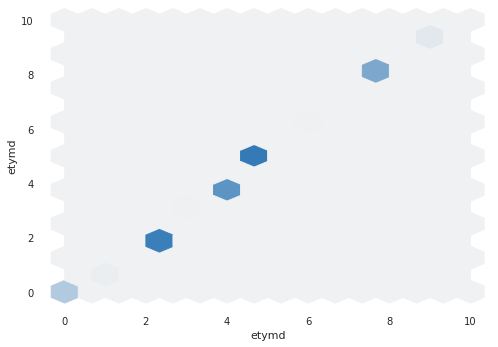

In [20]:
# !mkdir -p ./data/EDA/

profile_train.to_file("./data/EDA/df_all_EDA.html")

# Customer Classify

## Card Type


---

前提假設：假定顧客皆為理性消費者，會根據信用卡的權益內容選定適合的信用卡進行消費  
根據玉山銀行信用卡產品，主要分為以下三類：  
*   聯名卡：針對聯名特店進行消費（ex: 家樂福聯名卡、南山人壽聯名卡、統一時代聯名卡等）
*   海外消費：針對海外交易進行消費（ex: 雙幣卡、only卡）
*   一般消費：Pi 拍錢包信用卡、UBear信用卡（針對數位通路.超商等消費加碼回饋）

分類基準：
*   是否為海外消費
*   是否為網購
*   MCC消費種類數






In [ ]:
df.head(5)

### 是否為海外消費

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="stocn", hue="fraud_ind", data=df[df.fraud_ind!=-1], palette="Greens_d",
              order=pd.value_counts(df[df.fraud_ind!=-1]['stocn']).iloc[:5].index)
## 102為國內消費

In [ ]:
df["oversea_flag"] = df.stocn != 102

In [ ]:
# change to percentage 0 代表為國內
oversea_pct = df.loc[:,['cano','oversea_flag']][df.fraud_ind!=-1].groupby('cano').mean()

In [ ]:
# clustering by k-means with elbow method
from sklearn.cluster import KMeans

sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(oversea_pct)
#   oversea_pct["clusters"] = kmeans.labels_
#   print(oversea_pct["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
##k = 2 
kmeans = KMeans(n_clusters=2, max_iter=1000).fit(oversea_pct)
oversea_pct["clusters"] = kmeans.labels_
oversea_pct.head(20)

### 是否為網購消費

In [ ]:
# change to percentage
ecfg_pct = df.loc[:,['cano','ecfg']][df.fraud_ind!=-1].groupby('cano').mean()

In [ ]:
# clustering by k-means with elbow method
from sklearn.cluster import KMeans

sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(ecfg_pct)
#   oversea_pct["clusters"] = kmeans.labels_
#   print(oversea_pct["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
##k = 2 
kmeans = KMeans(n_clusters=2, max_iter=1000).fit(ecfg_pct)
ecfg_pct["clusters"] = kmeans.labels_
ecfg_pct.head(20)

### MCC消費種類數

#### MCC消費種類分群 [(連結)](https://zh.wikipedia.org/wiki/商户类别代码)

---
由於一個商戶類別是由好幾種MCC CODE組成  
假定同一種商戶類別，底下各自的MCC CODE資料有相似的敘述統計量


In [ ]:
mcc_code = df.loc[:,['mcc', 'conam']].groupby(['mcc']).describe() 

In [ ]:
mcc_code.columns

In [ ]:
mcc_code.columns = mcc_code.columns.droplevel()

In [ ]:
mcc_code.fillna(0, inplace=True)

In [ ]:
mcc_code.head(5)

In [ ]:
mcc_code.columns

In [ ]:
# clustering by k-means with elbow method
from sklearn.cluster import KMeans

sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(mcc_code)
#   oversea_pct["clusters"] = kmeans.labels_
#   print(oversea_pct["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#### 各卡MCC消費占比

In [ ]:
# count mcc
mcc_txn_cnt = df.loc[:,['cano','mcc', 'conam']][df.fraud_ind!=-1].groupby(['cano','mcc']).count()
mcc_cnt = df.loc[:,['cano','mcc', 'conam']][df.fraud_ind!=-1].groupby(['cano','mcc']).count().groupby(['cano']).count()

In [ ]:
mcc_txn_cnt.groupby(['cano']).mean().head(5)

In [ ]:
 mcc_pct = mcc_txn_cnt.groupby(['cano']).apply(lambda x:100 * x / float(x.sum()))

In [ ]:
# clustering by k-means with elbow method
from sklearn.cluster import KMeans

sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(mcc_pct)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
##k = 3 
kmeans = KMeans(n_clusters=3, max_iter=1000).fit(mcc_pct)
mcc_pct["clusters"] = kmeans.labels_
mcc_pct

In [ ]:
#results visualization
plt.figure()
plt.scatter(mcc_pct['conam'], mcc_pct['conam'], c = mcc_pct['clusters'])
plt.axis('equal')
plt.title('Prediction')
plt.show()

In [ ]:
mcc_pct.groupby(['clusters']).describe()

#### 各卡MCC消費類型分群

In [ ]:
mcc_pct_sum = mcc_pct.groupby(['cano','clusters']).sum()

In [ ]:
mcc_pct_sum['rank'] = mcc_pct.groupby(['cano','clusters']).sum().groupby(['cano']).rank(ascending=False, method='max')

In [ ]:
mcc_pct_sum[mcc_pct_sum['rank']==1].head(20)